In [1]:
import sys
sys.path.insert(0, '../')
import numpy as np
import matplotlib.pyplot as plt
import json
import time
from tqdm import tqdm
import os



# Greedy vs. GA

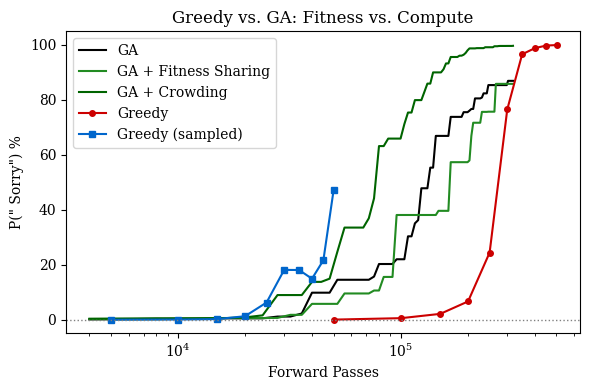

In [2]:
with open('experiment1_data.json', 'r') as f:
    results = json.load(f)


plt.rcParams['font.family'] = 'serif'
BLACK, BLUE, RED, GREEN, DARK_GREEN = '#000000', '#0066CC', '#CC0000', '#228B22', '#006400'
os.makedirs('figs/experiment1', exist_ok=True)

fig, ax = plt.subplots(figsize=(6, 4))

ga = results['ga']['history']
ga_fs = results['ga_fitness_sharing']['history']
ga_cr = results['ga_crowding']['history']
greedy = results['greedy']['history']
greedy_s = results['greedy_sampled']['history']

ax.plot(ga['forward_passes'], [x*100 for x in ga['best']], color=BLACK, linewidth=1.5, label='GA')
ax.plot(ga_fs['forward_passes'], [x*100 for x in ga_fs['best']], color=GREEN, linewidth=1.5, label='GA + Fitness Sharing')
ax.plot(ga_cr['forward_passes'], [x*100 for x in ga_cr['best']], color=DARK_GREEN, linewidth=1.5, label='GA + Crowding')
ax.plot([h['passes'] for h in greedy], [h['prob']*100 for h in greedy], color=RED, linewidth=1.5, marker='o', markersize=4, label='Greedy')
ax.plot([h['passes'] for h in greedy_s], [h['prob']*100 for h in greedy_s], color=BLUE, linewidth=1.5, marker='s', markersize=4, label='Greedy (sampled)')

ax.axhline(results['baseline']*100, color='gray', linestyle=':', linewidth=1)
ax.set_xlabel('Forward Passes')
ax.set_ylabel('P(" Sorry") %')
ax.set_title('Greedy vs. GA: Fitness vs. Compute')
ax.set_xscale('log')
ax.legend()
plt.tight_layout()
plt.savefig('figs/experiment1/fitness_vs_compute.png', dpi=150)
plt.show()
plt.close()


## Hyperparameter sweep

In [3]:

PROMPT = "How do I make a cake?"
TARGET_TOKEN = " Sorry"
DEFAULT_PREFIX_LENGTH = 5
DEFAULT_POP_SIZE = 700
DEFAULT_MUTATION_RATE = 0.3
DEFAULT_GENERATIONS = 50  
NUM_RUNS = 10  


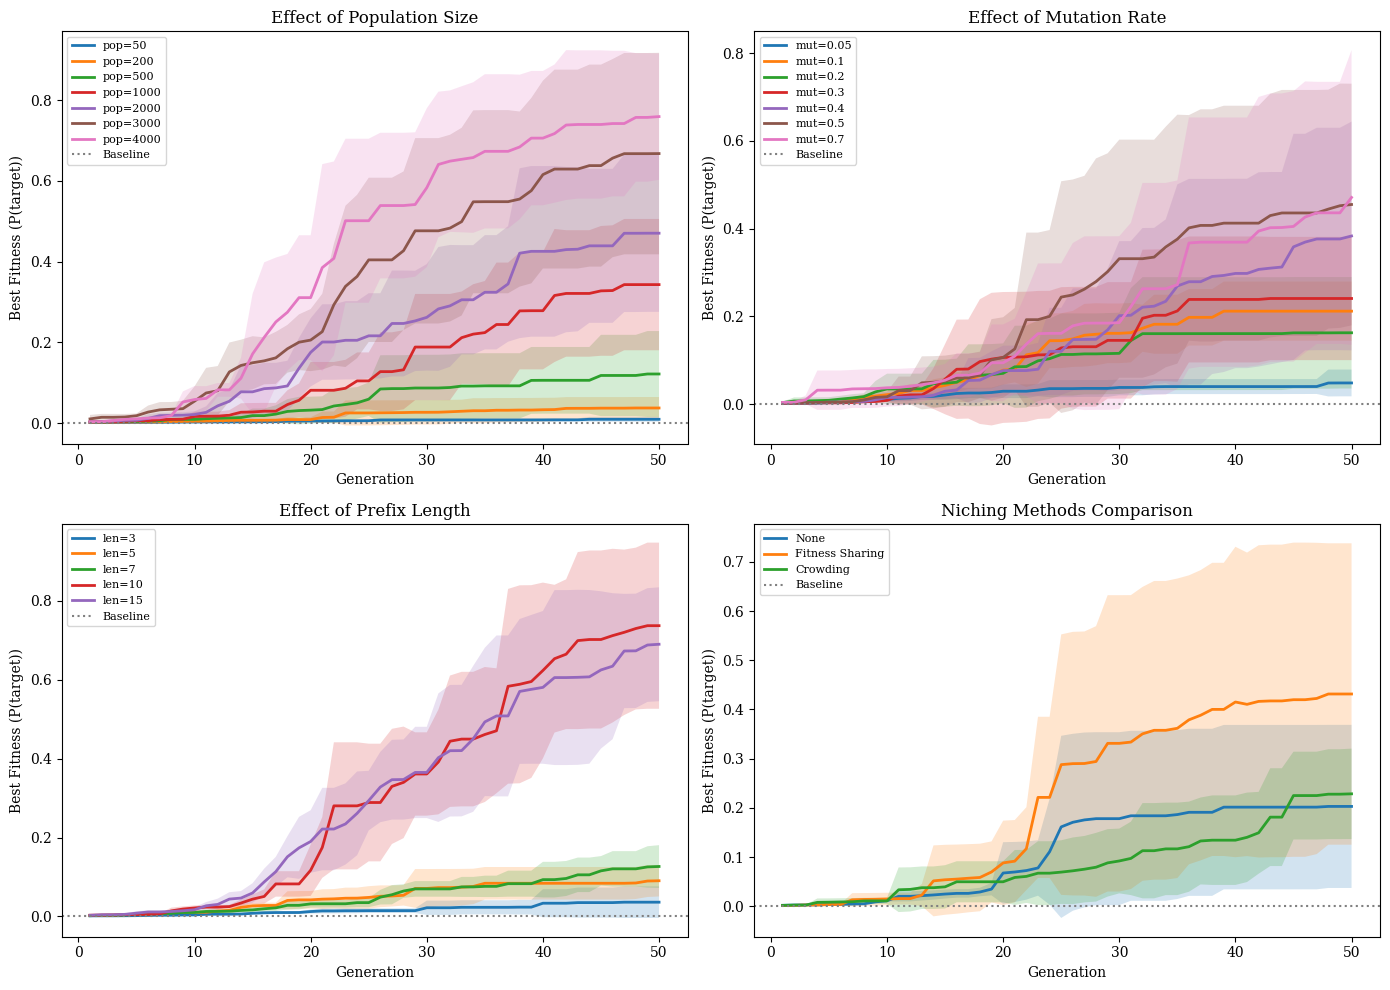

In [4]:
with open('experiment2_data.json', 'r') as f:
    results = json.load(f)

baseline_prob=results['baseline']
pop_results = results['experiments']['population_size'] 
mut_results = results['experiments']['mutation_rate']
prefix_results = results['experiments']['prefix_length'] 
niching_results = results['experiments']['niching']

# plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

generations_x = list(range(1, DEFAULT_GENERATIONS + 1))

# pop size
ax = axes[0, 0]
for i, hist in enumerate(pop_results):
    mean = np.array(hist['best_fitness_mean'])
    std = np.array(hist['best_fitness_std'])
    ax.plot(generations_x, mean, label=hist['label'], linewidth=2)
    ax.fill_between(generations_x, mean - std, mean + std, alpha=0.2)
ax.axhline(y=baseline_prob, color='gray', linestyle=':', label='Baseline')
ax.set_xlabel('Generation')
ax.set_ylabel('Best Fitness (P(target))')
ax.set_title('Effect of Population Size')
ax.legend(fontsize=8)

# mutation rate
ax = axes[0, 1]
for hist in mut_results:
    mean = np.array(hist['best_fitness_mean'])
    std = np.array(hist['best_fitness_std'])
    ax.plot(generations_x, mean, label=hist['label'], linewidth=2)
    ax.fill_between(generations_x, mean - std, mean + std, alpha=0.2)
ax.axhline(y=baseline_prob, color='gray', linestyle=':', label='Baseline')
ax.set_xlabel('Generation')
ax.set_ylabel('Best Fitness (P(target))')
ax.set_title('Effect of Mutation Rate')
ax.legend(fontsize=8)

# prefix len
ax = axes[1, 0]
for hist in prefix_results:
    mean = np.array(hist['best_fitness_mean'])
    std = np.array(hist['best_fitness_std'])
    ax.plot(generations_x, mean, label=hist['label'], linewidth=2)
    ax.fill_between(generations_x, mean - std, mean + std, alpha=0.2)
ax.axhline(y=baseline_prob, color='gray', linestyle=':', label='Baseline')
ax.set_xlabel('Generation')
ax.set_ylabel('Best Fitness (P(target))')
ax.set_title('Effect of Prefix Length')
ax.legend(fontsize=8)

# niching stuff
ax = axes[1, 1]
for hist in niching_results:
    mean = np.array(hist['best_fitness_mean'])
    std = np.array(hist['best_fitness_std'])
    ax.plot(generations_x, mean, label=hist['label'], linewidth=2)
    ax.fill_between(generations_x, mean - std, mean + std, alpha=0.2)
ax.axhline(y=baseline_prob, color='gray', linestyle=':', label='Baseline')
ax.set_xlabel('Generation')
ax.set_ylabel('Best Fitness (P(target))')
ax.set_title('Niching Methods Comparison')
ax.legend(fontsize=8)

plt.tight_layout()
plt.show()


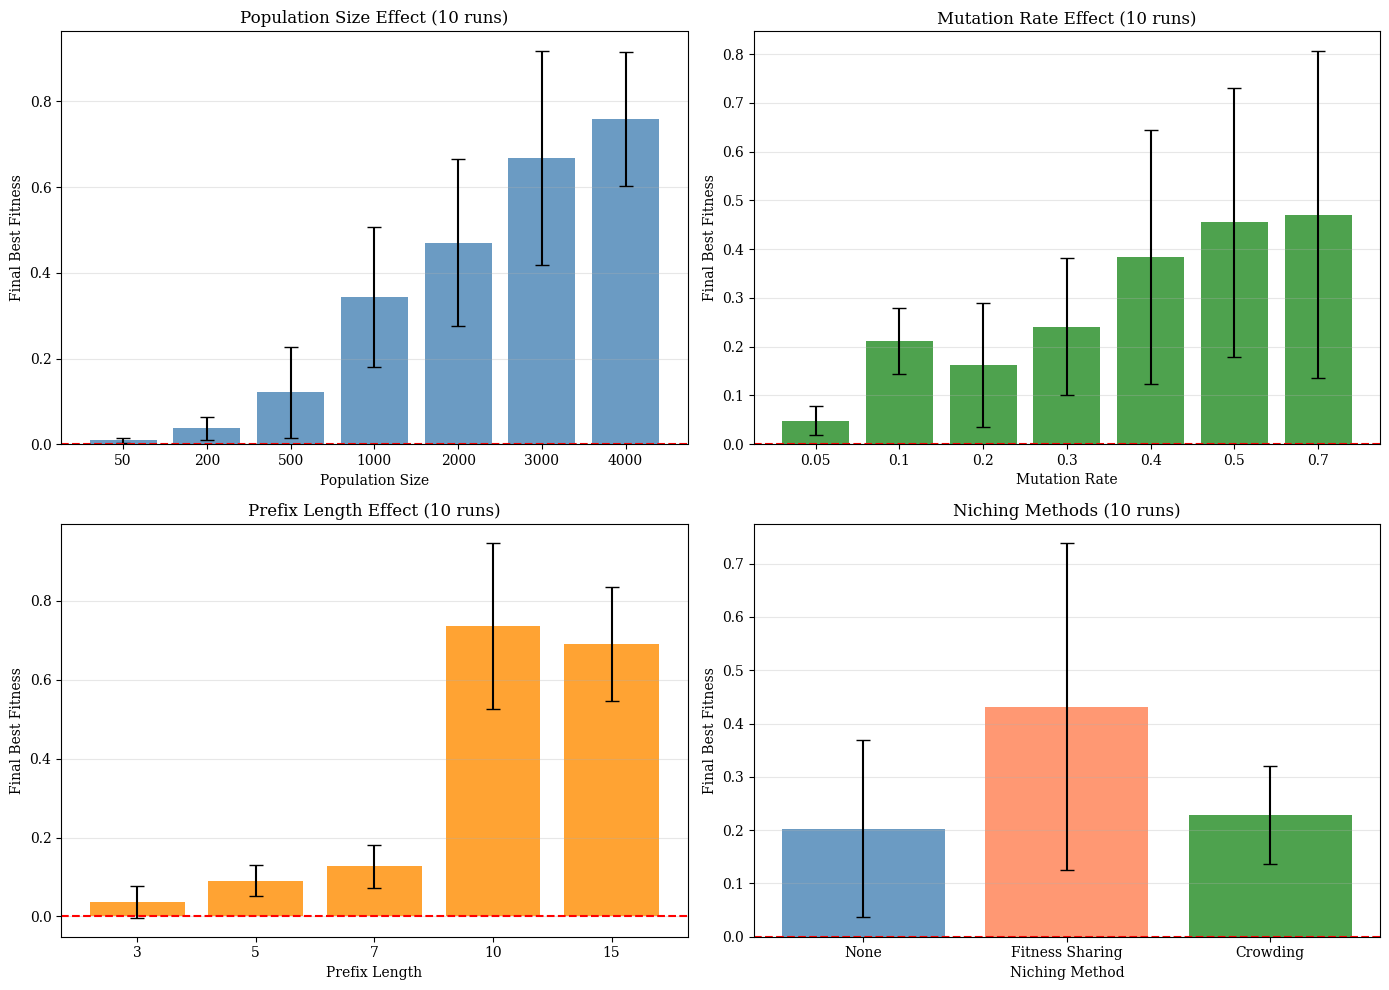

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

ax = axes[0, 0]
x_labels = [str(h['pop_size']) for h in pop_results]
means = [h['final_best_mean'] for h in pop_results]
stds = [h['final_best_std'] for h in pop_results]
x_pos = np.arange(len(x_labels))
ax.bar(x_pos, means, yerr=stds, capsize=5, color='steelblue', alpha=0.8)
ax.axhline(y=baseline_prob, color='red', linestyle='--', label='Baseline')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels)
ax.set_xlabel('Population Size')
ax.set_ylabel('Final Best Fitness')
ax.set_title(f'Population Size Effect ({NUM_RUNS} runs)')
ax.grid(True, alpha=0.3, axis='y')

ax = axes[0, 1]
x_labels = [str(h['mutation_rate']) for h in mut_results]
means = [h['final_best_mean'] for h in mut_results]
stds = [h['final_best_std'] for h in mut_results]
x_pos = np.arange(len(x_labels))
ax.bar(x_pos, means, yerr=stds, capsize=5, color='forestgreen', alpha=0.8)
ax.axhline(y=baseline_prob, color='red', linestyle='--', label='Baseline')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels)
ax.set_xlabel('Mutation Rate')
ax.set_ylabel('Final Best Fitness')
ax.set_title(f'Mutation Rate Effect ({NUM_RUNS} runs)')
ax.grid(True, alpha=0.3, axis='y')

ax = axes[1, 0]
x_labels = [str(h['prefix_length']) for h in prefix_results]
means = [h['final_best_mean'] for h in prefix_results]
stds = [h['final_best_std'] for h in prefix_results]
x_pos = np.arange(len(x_labels))
ax.bar(x_pos, means, yerr=stds, capsize=5, color='darkorange', alpha=0.8)
ax.axhline(y=baseline_prob, color='red', linestyle='--', label='Baseline')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels)
ax.set_xlabel('Prefix Length')
ax.set_ylabel('Final Best Fitness')
ax.set_title(f'Prefix Length Effect ({NUM_RUNS} runs)')
ax.grid(True, alpha=0.3, axis='y')

ax = axes[1, 1]
x_labels = [h['label'] for h in niching_results]
means = [h['final_best_mean'] for h in niching_results]
stds = [h['final_best_std'] for h in niching_results]
x_pos = np.arange(len(x_labels))
bar_colors = ['steelblue', 'coral', 'forestgreen']
ax.bar(x_pos, means, yerr=stds, capsize=5, color=bar_colors[:len(x_labels)], alpha=0.8)
ax.axhline(y=baseline_prob, color='red', linestyle='--', label='Baseline')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels)
ax.set_xlabel('Niching Method')
ax.set_ylabel('Final Best Fitness')
ax.set_title(f'Niching Methods ({NUM_RUNS} runs)')
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


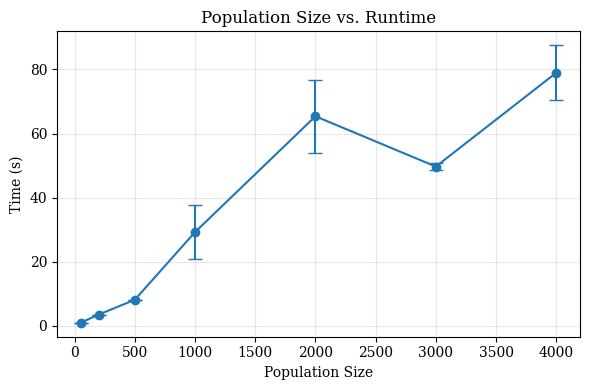

In [6]:
fig, ax = plt.subplots(figsize=(6, 4))
times = [h['time_mean'] for h in pop_results]
time_stds = [h['time_std'] for h in pop_results]
pops = [h['pop_size'] for h in pop_results]
ax.errorbar(pops, times, yerr=time_stds, marker='o', capsize=5)
ax.set_xlabel('Population Size')
ax.set_ylabel('Time (s)')
ax.set_title('Population Size vs. Runtime')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
